# Synthetic Control Method

In [1]:
import os
import normet as nm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/AQ_Weekly.csv',parse_dates=['date'])

In [3]:
df=df.query(f"date>='2015-05-01'").query(f"date<'2016-04-30'")

In [4]:
control_pool=["Dongguan", "Zhongshan" , "Foshan", "Beihai"
               , "Nanning","Nanchang" , "Xiamen", "Taizhou" 
               , "Ningbo","Guangzhou" , "Huizhou", "Hangzhou" 
               , "Liuzhou", "Shantou", "Jiangmen", "Heyuan", "Quanzhou","Haikou" , "Shenzhen", "Wenzhou", "Huzhou"
               , "Zhuhai", "Fuzhou", "Shaoxing", "Zhaoqing","Zhoushan"  
               , "Quzhou", "Jinhua", "Shaoguan" , "Sanya"
               , "Jieyang" , "Meizhou", "Shanwei" 
               , "Zhanjiang" , "Chaozhou", "Maoming" , "Yangjiang"]

In [5]:
df=df[df['ID'].isin(control_pool+["2+26 cities"])]

In [6]:
df.head()

,date,ID,CO,COwn,NO2,NO2wn,O3,O3_8h,O3_8hwn,O3wn,Ox,Oxwn,PM10,PM10wn,PM2.5,PM2.5wn,SO2,SO2wn
552,2015-05-03,2+26 cities,1.277812,1.328918,38.484623,45.068304,83.690318,133.060175,90.980089,65.825884,60.984249,54.415501,134.523758,139.447383,82.221006,73.876656,32.971551,36.822724
560,2015-05-10,2+26 cities,1.113243,1.298979,35.289414,44.352582,70.075957,103.363985,90.875789,66.100641,52.659234,54.337364,111.771975,134.412595,58.313419,69.386309,27.898696,35.284317
568,2015-05-17,2+26 cities,0.996762,1.274902,35.810778,43.981644,83.598553,125.082867,91.245896,66.418891,59.588514,54.389203,117.075504,129.474025,52.802738,67.146002,29.642007,34.742172
576,2015-05-24,2+26 cities,1.031094,1.267058,39.838150,43.398110,96.838000,149.709652,92.792728,66.695864,68.180477,54.529002,117.650986,121.537391,61.278043,65.876502,34.972942,34.482513
584,2015-05-31,2+26 cities,1.297053,1.285556,37.988483,43.548340,109.770206,165.029314,92.427553,66.419975,73.600167,54.475052,143.115653,126.681810,88.963408,67.239277,33.903061,34.490734


In [7]:
xx=nm.scm(df,'SO2wn','ID',"2+26 cities",control_pool,'2015-10-23')

In [8]:
xy=nm.scm_all(df,'SO2wn','ID',control_pool,'2015-10-23')

<Axes: xlabel='date'>

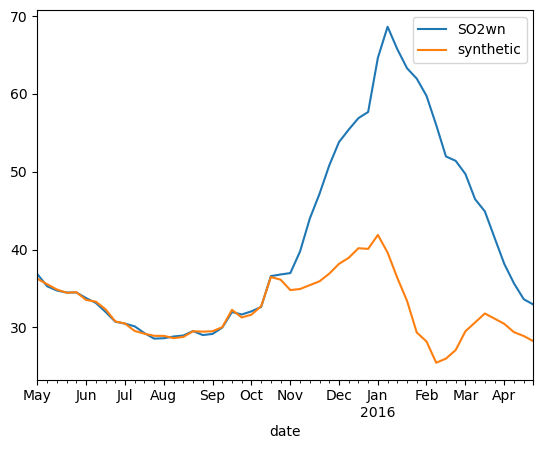

In [9]:
xx[['SO2wn','synthetic']].plot()

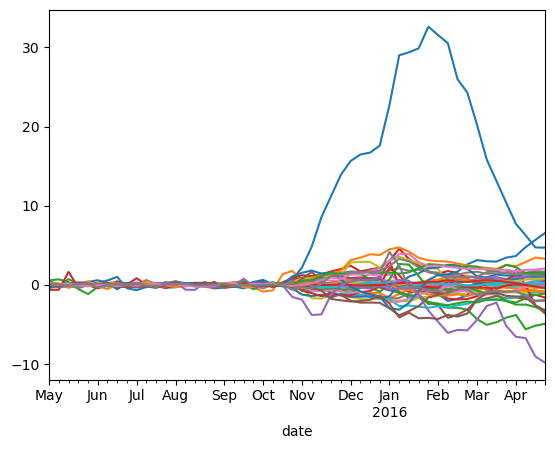

In [10]:
fig,ax=plt.subplots()
for i,city in enumerate(list(xy['ID'].unique())):
    xy[xy['ID']==city]['effects'].plot(ax=ax)

In [11]:

mlscdata1=nm.mlsc(df,'SO2wn','ID',"2+26 cities",control_pool,'2015-10-23',automl_pkg='flaml')

2024-09-24 21:10:59 : Training AutoML...
2024-09-24 21:12:29 : Best model is lgbm with best model parameters of {'n_estimators': 4, 'num_leaves': 6, 'min_child_samples': 2, 'learning_rate': 0.7148544310430003, 'log_max_bin': 4, 'colsample_bytree': 0.1939065104493952, 'reg_alpha': 0.01427319308925257, 'reg_lambda': 0.009361671309532844}


In [12]:

mlscdata2=nm.mlsc(df,'SO2wn','ID',"2+26 cities",control_pool,'2015-10-23',automl_pkg='h2o')

H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_n94921cs_5qrqdn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.829 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,1
H2O_cluster_status:,"locked, healthy"


2024-09-24 21:12:29: Training AutoML...

21:12:29.854: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 25.0.

2024-09-24 21:12:43: Best model obtained! - GBM_grid_1_AutoML_84_20240924_211229_model_1


<Axes: xlabel='date'>

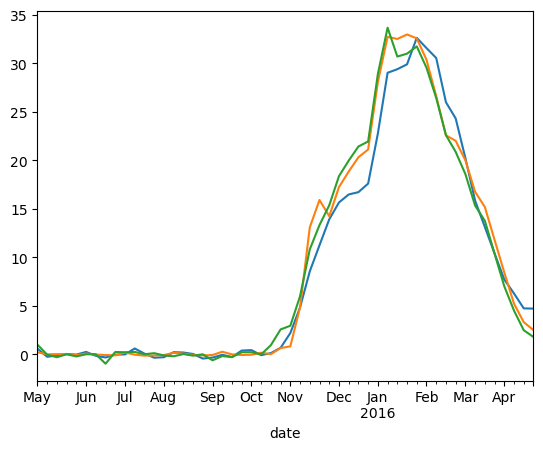

In [13]:
fig,ax=plt.subplots()
xx['effects'].plot(ax=ax)
mlscdata1['effects'].plot(ax=ax)
mlscdata2['effects'].plot(ax=ax)

In [14]:
model_config = {
    'time_budget': 10,                     # Total running time in seconds
    'metric': 'r2',                        # Primary metric for regression, 'mae', 'mse', 'r2', 'mape',...
    'estimator_list': ["lgbm"],            # List of ML learners: "lgbm", "rf", "xgboost", "extra_tree", "xgb_limitdepth"
}
mlscdataall_1=nm.mlsc_all(df,'SO2wn','ID',control_pool,'2015-10-23',automl_pkg='flaml', model_config=model_config)

2024-09-24 21:12:44 : Training AutoML...
2024-09-24 21:12:54 : Best model is lgbm with best model parameters of {'n_estimators': 12, 'num_leaves': 5, 'min_child_samples': 2, 'learning_rate': 1.0, 'log_max_bin': 10, 'colsample_bytree': 0.930479165045027, 'reg_alpha': 0.00942574688215323, 'reg_lambda': 13.299403187619442}
2024-09-24 21:12:54 : Training AutoML...
2024-09-24 21:13:04 : Best model is lgbm with best model parameters of {'n_estimators': 6, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.2921597058142577, 'log_max_bin': 5, 'colsample_bytree': 0.783599369600188, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.46338749432065923}
2024-09-24 21:13:04 : Training AutoML...
2024-09-24 21:13:14 : Best model is lgbm with best model parameters of {'n_estimators': 6, 'num_leaves': 5, 'min_child_samples': 3, 'learning_rate': 1.0, 'log_max_bin': 7, 'colsample_bytree': 0.9503055774263902, 'reg_alpha': 0.489191843809506, 'reg_lambda': 1.6501523530499025}
2024-09-24 21:13:14 : Training

In [15]:
model_config = {
        'time_budget': 10,
        #'max_models': 10,              # Maximum number of models to train
        #'max_mem_size': '12g',         # Maximum memory size for H2O
        'estimator_list': ['GBM'],     # List of algorithms to use in AutoML
}
mlscdataall_2=nm.mlsc_all(df,'SO2wn','ID',control_pool,'2015-10-23',automl_pkg='h2o', model_config=model_config)

H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321.H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321.H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321.H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321.H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321.H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321.H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321. connected.
--------------------------  -------------------------------
H2O_cluster_uptime:         8 hours 57 mins
H2O_cluster_timezone:       Europe/London
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:      

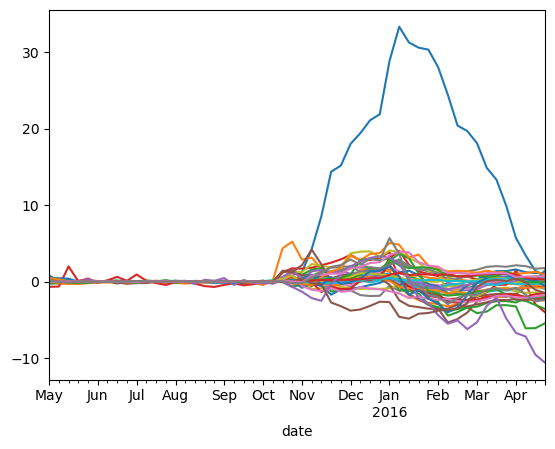

In [16]:
fig,ax=plt.subplots()
for i,city in enumerate(list(mlscdataall_1['ID'].unique())):
    mlscdataall_1[mlscdataall_1['ID']==city]['effects'].plot(ax=ax)

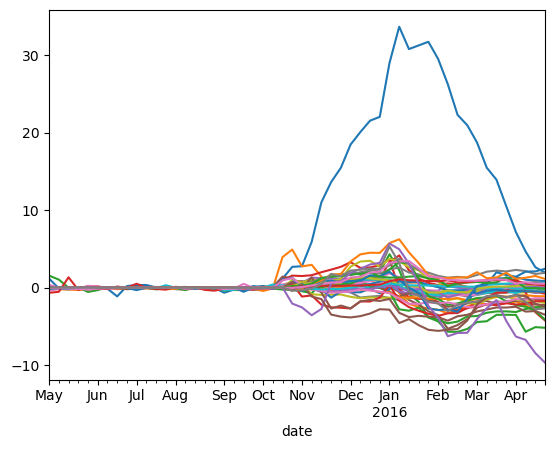

Closing connection _sid_8dbb at exit
H2O session _sid_8dbb closed.
Closing connection _sid_8531 at exit
H2O session _sid_8531 closed.
Closing connection _sid_ac4f at exit
H2O session _sid_ac4f closed.
Closing connection _sid_b025 at exit
H2O session _sid_b025 closed.
Closing connection _sid_8597 at exit
H2O session _sid_8597 closed.
Closing connection _sid_90c2 at exit
H2O session _sid_90c2 closed.
Closing connection _sid_b4d2 at exit
H2O session _sid_b4d2 closed.


In [17]:
fig,ax=plt.subplots()
for i,city in enumerate(list(mlscdataall_2['ID'].unique())):
    mlscdataall_2[mlscdataall_2['ID']==city]['effects'].plot(ax=ax)